In [1]:
import numpy as np
from scipy.special import jv
import matplotlib.pyplot as plt
%matplotlib inline

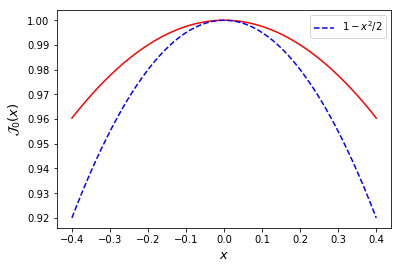

In [294]:
x=np.linspace(-0.4,0.4,5000)
bessel= jv(0,x)
plt.plot(x, bessel, 'r')
plt.plot(x, 1-0.5*x**2, 'b--', label='$1-x^2/2$')
plt.ylabel("$\mathcal{J}_0(x)$", fontsize=13)
plt.xlabel("$x$",fontsize=13)
plt.legend()
plt.savefig("bessel_fun_zoom.eps")

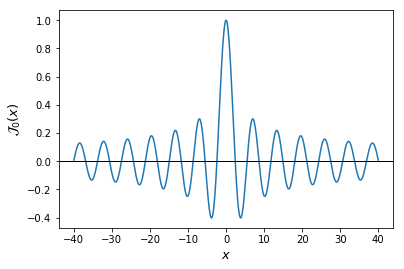

In [292]:
x=np.linspace(-40,40,5000)
bessel= jv(0,x)
plt.plot(x, bessel)
plt.ylabel("$\mathcal{J}_0(x)$", fontsize=13)
plt.xlabel("$x$",fontsize=13)
plt.axhline(linewidth=1, color='k')
plt.savefig("bessel_fun.eps")

### Solving linear equations
$AX=B$

In [9]:
a = np.array([[3,1], [1,2]])
b = np.array([9,8])
x = np.linalg.solve(a, b)
print x

[ 2.  3.]


In [10]:
np.dot(a, x)

array([ 9.,  8.])

In [99]:
def j_index(L):
    return np.linspace(-0.5*L,0.5*L, L+1)

In [225]:
def A_array_bc(L,J, lamda):
    diag_temp= 6*J**2+ lamda**2
    diag=diag_temp*np.identity(L+1) # L+1
    diag[0,0]=0.0; diag[L, L]=0.0
    off_diag_temp_left= -3*J**2*np.ones(L)# one less # j-1 side
    off_diag_temp_right= -3*J**2*np.ones(L)# one less # j+1 side
    off_diag_temp_left[0]=0.0 #dead BC
    off_diag_temp_right[-1]=0.0#dead BC
    off_diag=np.diag(off_diag_temp_left, -1)+ np.diag(off_diag_temp_right, 1)
    return off_diag+diag

In [142]:
def A_array(L,J, lamda):
    diag_temp= 6*J**2+ lamda**2
    diag=diag_temp*np.identity(L+1) # L+1
    off_diag_temp= -3*J**2*np.ones(L)# one less # j-1 side
    off_diag=np.diag(off_diag_temp, -1)+ np.diag(off_diag_temp, 1)
    return off_diag+diag
def B_array(L,J,lamda):
    return -J *np.ones(L+1)

In [194]:
L=4
J=1.0
lamda=5.0
A= A_array_bc(L,J, lamda)
print A

[[  0.  -3.   0.   0.   0.]
 [  0.  31.  -3.   0.   0.]
 [  0.  -3.  31.  -3.   0.]
 [  0.   0.  -3.  31.   0.]
 [  0.   0.   0.  -3.   0.]]


0.0

In [125]:
print diag[0,0], diag[4,4]
print diag

49.0 49.0
[[ 49.   0.   0.   0.   0.]
 [  0.  49.   0.   0.   0.]
 [  0.   0.  49.   0.   0.]
 [  0.   0.   0.  49.   0.]
 [  0.   0.   0.   0.  49.]]


In [268]:
from scipy.linalg import lstsq
L=1024
J=1.0
lamda=0.5
A= A_array_bc(L,J, lamda)
B= B_array(L,J, lamda)
alpha, res, rank, s = lstsq(A, B)

In [274]:
L=1024
J=1.0
lamda=0.75
A= A_array(L,J, lamda)
B= B_array(L,J, lamda)
alpha_half =  lstsq(A, B)[0]

In [237]:
len(alp)

513

In [250]:
j_index_arr=j_index(L)

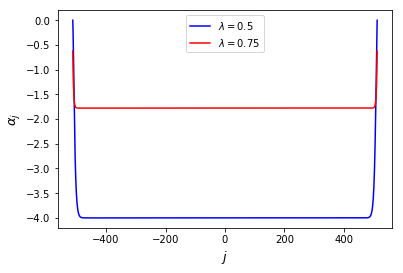

In [276]:
plt.plot(j_index_arr, alpha, 'b', label= r'$\lambda=0.5$')
plt.plot(j_index_arr, alpha_half, 'r', label= r'$\lambda=0.75$')
plt.legend(loc='best')
plt.ylabel(r'$\alpha_j$', fontsize=13)
plt.xlabel(r'$j$', fontsize=13)
plt.savefig("alpha_j_linear_potn.eps")

In [300]:
def J_eff_CD(J,alpha, lamba_dot):
    return J*(1+ (lamba_dot*alpha/J)**2)**0.5

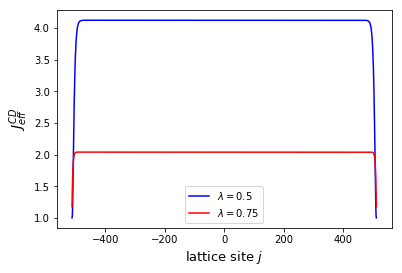

In [333]:
plt.plot(j_index_arr, J_eff_CD(1.0,alpha,1.0), 'b', label= r'$\lambda=0.5$')
plt.plot(j_index_arr, J_eff(1.0,alpha_half,1.0), 'r', label= r'$\lambda=0.75$')
plt.legend(loc='best')
plt.ylabel(r'$J^{CD}_{eff}$', fontsize=14)
plt.xlabel(r'lattice site $j$', fontsize=13)
plt.savefig("j_eff_cd.eps")

In [320]:
def driving_field_amplitude(J_eff_CD,L):
    J_floquet=np.max(J_eff_CD_arr)
    return np.sqrt(2)*L*(1-J_eff_CD/J_floquet)**0.5

In [336]:
J_eff_CD_arr=J_eff_CD(1.0,alpha,1.0)
J_floquet=np.max(J_eff_CD_arr)
driving_field_amplitude_half_lambda=driving_field_amplitude(J_eff_CD_arr, 1024)

In [322]:
J_eff_CD_arr=J_eff_CD(1.0,alpha_half,1.0)
driving_field_amplitude_threequart_lambda=driving_field_amplitude(J_eff_CD_arr,1024)

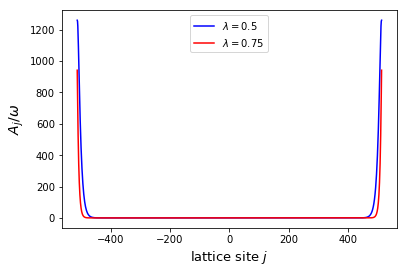

In [355]:
plt.plot(j_index_arr, driving_field_amplitude_half_lambda, 'b', label= r'$\lambda=0.5$')
plt.plot(j_index_arr,driving_field_amplitude_threequart_lambda, 'r', label= r'$\lambda=0.75$')
plt.legend(loc='best')
plt.ylabel(r'$A_{j}/ \omega$', fontsize=14)
plt.xlabel(r'lattice site $j$', fontsize=13)
plt.savefig("driving_field_amplitude.eps")

In [ ]:
def deriv(y,x):
    dy = np.zeros(len(y),np.float)
    dy[0:-1] = np.diff(y)/np.diff(x)
    dy[-1] = dy[-2]#(np.log(y[-1]) - np.log(y[-2]))/(np.log(x[-1]) - np.log(x[-2])) #last two elements are same
    return dy

In [351]:
bessel_half_lamba= jv(0,np.diff(driving_field_amplitude_half_lambda))
bessel_threequart_lamba= jv(0,np.diff(driving_field_amplitude_threequart_lambda))

In [349]:
J_eff_CD_arr=J_eff_CD(1.0,alpha,1.0)
J_floquet_half_lamba=np.max(J_eff_CD_arr)
J_eff_CD_arr=J_eff_CD(1.0,alpha_half,1.0)
J_floquet_threequart_lamba=np.max(J_eff_CD_arr)

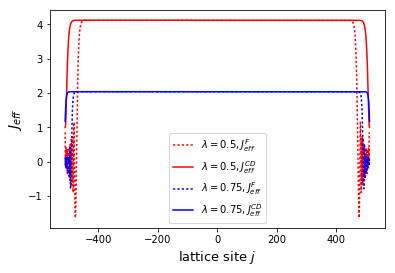

In [357]:
plt.plot(j_index_arr[0:-1], J_floquet_half_lamba*bessel_half_lamba, 'r:',label= r'$\lambda=0.5, J^{F}_{eff}$')
plt.plot(j_index_arr, J_eff_CD(1.0,alpha,1.0), 'r-', label= r'$\lambda=0.5, J^{CD}_{eff}$')
plt.plot(j_index_arr[0:-1], J_floquet_threequart_lamba*bessel_threequart_lamba, 'b:',label= r'$\lambda=0.75, J^{F}_{eff}$')
plt.plot(j_index_arr, J_eff(1.0,alpha_half,1.0), 'b', label=r'$\lambda=0.75, J^{CD}_{eff}$')
plt.ylabel(r'$J_{eff}$', fontsize=14)
plt.xlabel(r'lattice site $j$', fontsize=13)
plt.legend(loc='best')
plt.savefig("j_eff_f.eps")

### Eckart potential: inserting potential
$V(\lambda,j) = \lambda(t)/(\cosh^2 j/ \xi)$

In [2]:
def eckart_potential(lamba, x, xi):
    return lamba/np.cosh(x/xi)**2

In [83]:
L=1024
lamba=1.0
xi=8.0
x=np.linspace(-L/2, L/2, L+1)

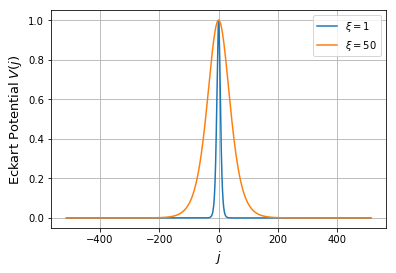

In [99]:
plt.plot(x, eckart_potential(lamba,x,8.0), label= r'$\xi=1$')
plt.plot(x, eckart_potential(lamba,x,50.0),label=r'$\xi=50$')
plt.grid()
plt.legend()
plt.ylabel(r'Eckart Potential $V(j)$', fontsize=13)
plt.xlabel(r'$j$', fontsize=13)
plt.savefig("eckart_potn.eps")

In [100]:
def A_array_eckart(L,J, lamda):
    xi=8.0
    x=np.linspace(-L/2, L/2, L+1)
    potn=eckart_potential(lamda,x,xi)
    potn_diff= np.roll(potn,-1)-potn
    diag_temp= 6*J**2+ potn_diff**2
    diag=diag_temp*np.identity(L+1) # L+1
    diag[0,0]=0.0; diag[L, L]=0.0
    off_diag_temp_left= -3*J**2*np.ones(L)# one less # j-1 side
    off_diag_temp_right= -3*J**2*np.ones(L)# one less # j+1 side
    off_diag_temp_left[0]=0.0 #dead BC
    off_diag_temp_right[-1]=0.0#dead BC
    off_diag=np.diag(off_diag_temp_left, -1)+ np.diag(off_diag_temp_right, 1)
    return off_diag+diag

In [4]:
def B_array_eckart(L,J,lamda):
    x=np.linspace(-L/2, L/2, L+1)
    potn=eckart_potential(1.0,x,xi) #derivative makes lambda=1
    potn_diff= np.roll(potn,-1)-potn
    return -J *np.ones(L+1)*potn_diff

In [102]:
def j_index(L):
    return np.linspace(-0.5*L,0.5*L, L+1)

In [14]:
L=2
lamba=1.0
xi=8.0

pot_i=eckart_potential(lamba,x,xi)
pot_i_plus=np.roll(pot_i,1)

In [24]:
L=4
x=np.linspace(-L/2, L/2, L+1)
x

array([-2., -1.,  0.,  1.,  2.])

array([ 1.,  1.,  1.,  1., -4.])

In [103]:
from scipy.linalg import lstsq
L=1024
J=1.0
lamda=1.0
A= A_array_eckart(L,J, lamda)
B= B_array(L,J, lamda)
alpha, res, rank, s = lstsq(A, B)

In [104]:
L=1024
J=1.0
lamda=5.0
A= A_array_eckart(L,J, lamda)
B= B_array(L,J, lamda)
alpha_three_quart, res, rank, s = lstsq(A, B)

In [129]:
j_index_arr=j_index(L)

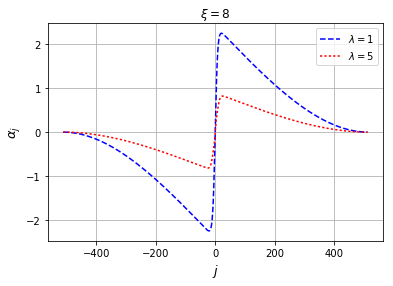

In [139]:
plt.plot(j_index_arr, alpha, 'b--', label= r'$\lambda=1$')
plt.plot(j_index_arr, alpha_three_quart, 'r:', label= r'$\lambda=5$')
plt.legend(loc='best')
plt.ylabel(r'$\alpha_j$', fontsize=13)
plt.xlabel(r'$j$', fontsize=13)
plt.title(r'$\xi=8$')
plt.grid()
#plt.savefig("alpha_j_eckart_potn_loc.eps")

In [70]:
xi=50.0
x=np.linspace(-L/2, L/2, L+1)
potn=eckart_potential(1.0,x,xi)
potn_diff= np.roll(potn,-1)-potn

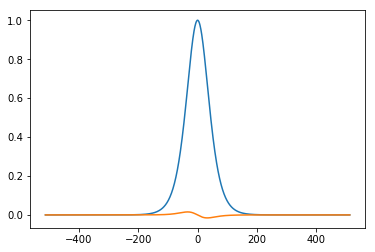

In [71]:
plt.plot(x, potn)
plt.plot(x, potn_diff)

In [107]:
def J_eff_CD(J,alpha, lamba_dot):
    return J*(1+ (lamba_dot*alpha/J)**2)**0.5

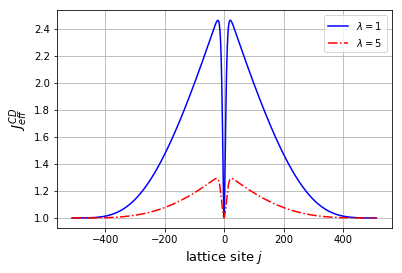

In [185]:
plt.plot(j_index_arr, J_eff_CD(1.0,alpha,1.0), 'b-', label= r'$\lambda=1$')
plt.plot(j_index_arr, J_eff_CD(1.0,alpha_three_quart,1.0), 'r-.', label= r'$\lambda=5$')
plt.legend(loc='best')
plt.ylabel(r'$J^{CD}_{eff}$', fontsize=14)
plt.xlabel(r'lattice site $j$', fontsize=13)
plt.grid()
plt.savefig("j_eff_cd_eckart_potn.eps")

In [167]:
def driving_field_amplitude_diff(J_eff_CD):
    J_floquet=np.max(J_eff_CD)
    return np.sqrt(2)*(1-J_eff_CD/J_floquet)**0.5

In [172]:
J_eff_CD_arr_1=J_eff_CD(1.0,alpha,1.0)
driving_field_amplitude_lambda1_diff=driving_field_amplitude_diff(J_eff_CD_arr_1)
#driving_field_amp_arr=np.zeros(L+1)  

In [171]:
J_eff_CD_arr=J_eff_CD(1.0,alpha_three_quart,1.0)
driving_field_amplitude_lambda5_diff=driving_field_amplitude_diff(J_eff_CD_arr)

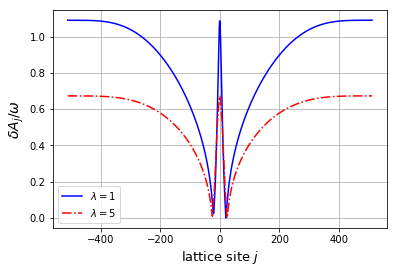

In [186]:
plt.plot(j_index_arr, driving_field_amplitude_lambda1_diff, 'b-', label= r'$\lambda=1$')
plt.plot(j_index_arr,driving_field_amplitude_lambda5_diff, 'r-.', label= r'$\lambda=5$')
plt.legend(loc='best')
plt.ylabel(r'$\delta A_{j}/ \omega$', fontsize=14)
plt.xlabel(r'lattice site $j$', fontsize=13)
plt.grid()
plt.savefig("driving_field_amplitude_diff_eckart_potn.eps")

In [174]:
L=1024
driving_field_amp_lambda5_arr=np.zeros(L+1)
for i in range(L):
    driving_field_amp_lambda5_arr[i+1]=driving_field_amp_lambda5_arr[i]+ driving_field_amplitude_lambda5_diff[i]

In [175]:
L=1024
driving_field_amp_lambda1_arr=np.zeros(L+1)
for i in range(L):
    driving_field_amp_lambda1_arr[i+1]=driving_field_amp_lambda1_arr[i]+ driving_field_amplitude_lambda1_diff[i]

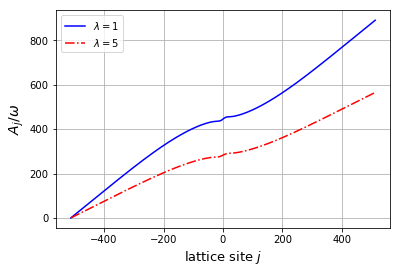

In [187]:
plt.plot(j_index_arr, driving_field_amp_lambda1_arr, 'b-', label='$\lambda=1$')
plt.plot(j_index_arr, driving_field_amp_lambda5_arr, 'r-.', label='$\lambda=5$')
plt.legend(loc='best')
plt.ylabel(r'$A_{j}/ \omega$', fontsize=14)
plt.xlabel(r'lattice site $j$', fontsize=13)
plt.grid()
plt.savefig("driving_field_amplitude_eckart_potn.eps")

In [181]:
bessel_lamba1= jv(0,driving_field_amplitude_lambda1_diff)
bessel_lamba5= jv(0,driving_field_amplitude_lambda5_diff)

In [182]:
J_eff_CD_arr=J_eff_CD(1.0,alpha,1.0)
J_floquet_lamba1=np.max(J_eff_CD_arr)
J_eff_CD_arr=J_eff_CD(1.0,alpha_three_quart,1.0)
J_floquet_lamba5=np.max(J_eff_CD_arr)

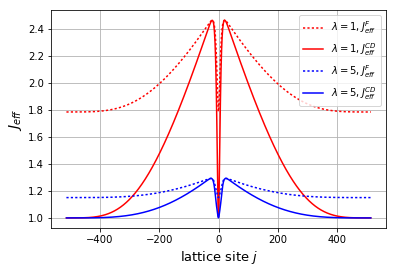

In [188]:
plt.plot(j_index_arr, J_floquet_lamba1*bessel_lamba1, 'r:',label= r'$\lambda=1, J^{F}_{eff}$')
plt.plot(j_index_arr, J_eff_CD(1.0,alpha,1.0), 'r-', label= r'$\lambda=1, J^{CD}_{eff}$')
plt.plot(j_index_arr, J_floquet_lamba5*bessel_lamba5, 'b:',label= r'$\lambda=5, J^{F}_{eff}$')
plt.plot(j_index_arr, J_eff_CD(1.0,alpha_three_quart,1.0), 'b', label=r'$\lambda=5, J^{CD}_{eff}$')
plt.ylabel(r'$J_{eff}$', fontsize=14)
plt.xlabel(r'lattice site $j$', fontsize=13)
plt.legend(loc='best')
plt.grid()
plt.savefig("j_eff_comp_eckart_potn.eps")

### Eckart potential: moving center of potential
$V(\lambda,j) = \dfrac{2J}{\cosh^2 [(j-\lambda)/ \xi]}$

In [5]:
def eckart_potential_moving(J,lamba, x, xi):
    return 2*J/np.cosh((x-lamba)/xi)**2

def derivative_eckart_potential_moving(J,lamba, x, xi):
    return -(J*xi)/np.sinh((x-lamba)/xi)

In [14]:
L=1024
lamba=1.5
xi=8.0
J=1.0
x=np.linspace(-L/2, L/2, L+1)

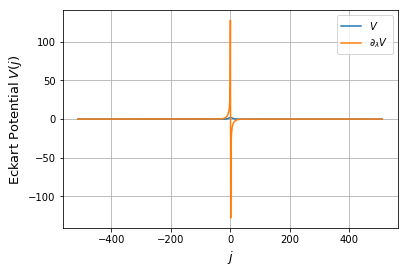

In [20]:
plt.plot(x, eckart_potential_moving(J,lamba,x,8.0), label= r'$V$')
plt.plot(x, derivative_eckart_potential_moving(J,lamba,x,8.0),label=r'$\partial_{\lambda}V$')
plt.grid()
plt.legend()
plt.ylabel(r'Eckart Potential $V(j)$', fontsize=13)
plt.xlabel(r'$j$', fontsize=13)
#plt.savefig("eckart_potn.eps")

In [50]:
def A_array_eckart_moving(L,J, lamda):
    xi=8.0
    x=np.linspace(-L/2, L/2, L+1)
    potn=eckart_potential_moving(J,lamda,x,xi)
    potn_diff= np.roll(potn,-1)-potn
    diag_temp= 6*J**2+ potn_diff**2
    diag=diag_temp*np.identity(L+1) # L+1
    diag[0,0]=0.0; diag[L, L]=0.0
    off_diag_temp_left= -3*J**2*np.ones(L)# one less # j-1 side
    off_diag_temp_right= -3*J**2*np.ones(L)# one less # j+1 side
    off_diag_temp_left[0]=0.0 #dead BC
    off_diag_temp_right[-1]=0.0#dead BC
    off_diag=np.diag(off_diag_temp_left, -1)+ np.diag(off_diag_temp_right, 1)
    return off_diag+diag

In [51]:
def B_array_eckart_moving(L,J,lamda):
    xi=8.0
    x=np.linspace(-L/2, L/2, L+1)
    potn=derivative_eckart_potential_moving(J,lamda,x,xi)
    potn_diff= np.roll(potn,-1)-potn
    return -J *np.ones(L+1)*potn_diff

In [61]:
from scipy.linalg import lstsq
L=1024
J=1.0
lamda=0.5
A= A_array_eckart_moving(L,J, lamda)
B= B_array_eckart_moving(L,J, lamda)
alpha_onehalf, res, rank, s = lstsq(A, B)

In [62]:
L=1024
J=1.0
lamda=100.5
A= A_array_eckart_moving(L,J, lamda)
B= B_array_eckart_moving(L,J, lamda)
alpha_twohalf, res, rank, s = lstsq(A, B)

In [46]:
def j_index(L):
    return np.linspace(-0.5*L,0.5*L, L+1)
j_index_arr=j_index(L)

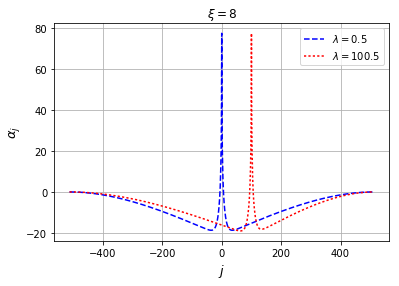

In [63]:
plt.plot(j_index_arr, alpha_onehalf, 'b--', label= r'$\lambda=0.5$')
plt.plot(j_index_arr, alpha_twohalf, 'r:', label= r'$\lambda=100.5$')
plt.legend(loc='best')
plt.ylabel(r'$\alpha_j$', fontsize=13)
plt.xlabel(r'$j$', fontsize=13)
plt.title(r'$\xi=8$')
plt.grid()
#plt.savefig("alpha_j_eckart_potn_loc.eps")

In [48]:
def J_eff_CD(J,alpha, lamba_dot):
    return J*(1+ (lamba_dot*alpha/J)**2)**0.5

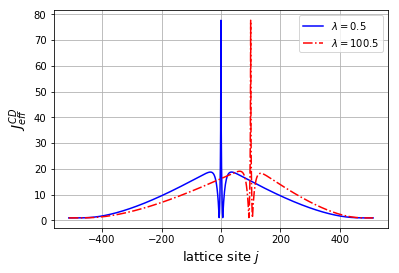

In [64]:
plt.plot(j_index_arr, J_eff_CD(1.0,alpha_onehalf,1.0), 'b-', label= r'$\lambda=0.5$')
plt.plot(j_index_arr, J_eff_CD(1.0,alpha_twohalf,1.0), 'r-.', label= r'$\lambda=100.5$')
plt.legend(loc='best')
plt.ylabel(r'$J^{CD}_{eff}$', fontsize=14)
plt.xlabel(r'lattice site $j$', fontsize=13)
plt.grid()
#plt.savefig("j_eff_cd_eckart_potn.eps")

In [65]:
def driving_field_amplitude_diff(J_eff_CD):
    J_floquet=np.max(J_eff_CD)
    return np.sqrt(2)*(1-J_eff_CD/J_floquet)**0.5

In [66]:
J_eff_CD_arr_1=J_eff_CD(1.0,alpha_onehalf,1.0)
driving_field_amplitude_lambda1_diff=driving_field_amplitude_diff(J_eff_CD_arr_1)

In [67]:
J_eff_CD_arr=J_eff_CD(1.0,alpha_twohalf,1.0)
driving_field_amplitude_lambda5_diff=driving_field_amplitude_diff(J_eff_CD_arr)

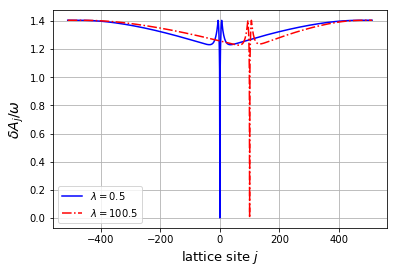

In [69]:
plt.plot(j_index_arr, driving_field_amplitude_lambda1_diff, 'b-', label= r'$\lambda=0.5$')
plt.plot(j_index_arr,driving_field_amplitude_lambda5_diff, 'r-.', label= r'$\lambda=100.5$')
plt.legend(loc='best')
plt.ylabel(r'$\delta A_{j}/ \omega$', fontsize=14)
plt.xlabel(r'lattice site $j$', fontsize=13)
plt.grid()
#plt.savefig("driving_field_amplitude_diff_eckart_potn.eps")

In [70]:
bessel_lamba1= jv(0,driving_field_amplitude_lambda1_diff)
bessel_lamba5= jv(0,driving_field_amplitude_lambda5_diff)

In [72]:
J_eff_CD_arr=J_eff_CD(1.0,alpha_onehalf,1.0)
J_floquet_lamba1=np.max(J_eff_CD_arr)
J_eff_CD_arr=J_eff_CD(1.0,alpha_twohalf,1.0)
J_floquet_lamba5=np.max(J_eff_CD_arr)

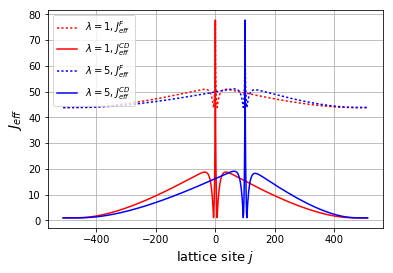

In [74]:
plt.plot(j_index_arr, J_floquet_lamba1*bessel_lamba1, 'r:',label= r'$\lambda=1, J^{F}_{eff}$')
plt.plot(j_index_arr, J_eff_CD(1.0,alpha_onehalf,1.0), 'r-', label= r'$\lambda=1, J^{CD}_{eff}$')
plt.plot(j_index_arr, J_floquet_lamba5*bessel_lamba5, 'b:',label= r'$\lambda=5, J^{F}_{eff}$')
plt.plot(j_index_arr, J_eff_CD(1.0,alpha_twohalf,1.0), 'b', label=r'$\lambda=5, J^{CD}_{eff}$')
plt.ylabel(r'$J_{eff}$', fontsize=14)
plt.xlabel(r'lattice site $j$', fontsize=13)
plt.legend(loc='best')
plt.grid()
#plt.savefig("j_eff_comp_eckart_potn.eps")